### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩
iris_data = load_iris()

# 학습과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습.

dt_clf.fit(X_train,y_train)# train데이터 fit 

pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test,pred) # test, pred 정확도 

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9333


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

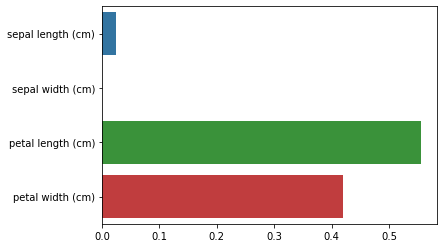

In [4]:
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리(Decision TREE) 과적합(Overfitting)

### 결정 트리 실습 - Human Activity Recognition

### 중복된 피처명을 확인

##### 원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
##### 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [5]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5) # GridSearchCV 파라미터 지정

grid_cv.fit(X_train , y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.9500
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}


In [7]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']] 

max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train) # train 데이터 fit
    pred = dt_clf.predict(X_test) # test 데이터 predict 하기
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.9333
max_depth = 8 정확도: 0.9333
max_depth = 10 정확도: 0.9333
max_depth = 12 정확도: 0.9333
max_depth = 16 정확도: 0.9333
max_depth = 20 정확도: 0.9333
max_depth = 24 정확도: 0.9333


In [8]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_)) 
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.9500
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [9]:
best_df_clf = grid_cv# GrideSearch 최적의 파라미터 
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9333


### 다른모델 적용

In [10]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)

pred_proba = xgb.predict_proba(X_test) #[:, 1]
print(pred_proba)

[15:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[0.00149303 0.00196139 0.9965456 ]
 [0.00149303 0.00196139 0.9965456 ]
 [0.01147995 0.8691031  0.11941702]
 [0.00338319 0.9850935  0.01152328]
 [0.00149298 0.00199731 0.99650973]
 [0.99254495 0.00450165 0.00295339]
 [0.00340813 0.9923556  0.00423632]
 [0.98272175 0.01476309 0.0025152 ]
 [0.99254495 0.00450165 0.00295339]
 [0.00288274 0.99336725 0.00375   ]
 [0.00392732 0.9644795  0.03159317]
 [0.00217897 0.99455464 0.00326633]
 [0.01583385 0.97198266 0.01218347]
 [0.00760514 0.04584144 0.9465534 ]
 [0.00175784 0.00230927 0.9959329 ]
 [0.9840185  0.01213647 0.00384507]
 [0.00149298 0.00199731 0.99650973]
 [0.00663598 0.98825794 0.0051061 ]
 [0.00752987 0.02189054 0.9705796 ]
 [0.0

In [11]:
from sklearn.ensemble import RandomForestClassifier

randomclf = RandomForestClassifier(random_state=14)
randomclf.fit(X_train, y_train)
pred = randomclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9333


In [12]:
params = { 'n_estimators' : [100, 200], 'max_depth': [3, 4, 5]}
grid_cv = GridSearchCV(randomclf, param_grid=params, cv=4)
grid_cv.fit(X_train, y_train)

print('랜덤 포레스트 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('랜덤 포레스트 최적 하이퍼 파라미터:', grid_cv.best_params_)

랜덤 포레스트 최고 평균 정확도 수치:0.9583
랜덤 포레스트 최적 하이퍼 파라미터: {'max_depth': 4, 'n_estimators': 100}
